# SPSS Modelerの2値分類モデル評価のための精度分析ノードと評価フラグノードをPythonで書き換える。信用リスクの判定モデルの評価


以下のようなデータを用いて決定木モデルを作ります。

目的変数
Risk：信用リスク

説明変数
Age：年齢
Income：収入ランク
Credit_cards：クレジットカード枚数
Education：学歴
Car_loans:車のローン数

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/223763/baaa8f9e-0a61-14c4-87dd-9f8bcc9c4665.png)


年齢や収入ランクから信用リスクを判定する2値分類のモデルを評価します。

In [1]:
#必要に応じて以下を導入してください。
#!conda install graphviz
#!conda install pydotplus
#!pip install sklearn.externals
#!pip install graphviz
#!conda install category_encoders
#!conda install -c conda-forge scikit-plot

In [2]:
!wget https://github.com/hkwd/200611Modeler2Python/raw/master/data/credit_risk.csv

'wget' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [3]:
#データの読み込み
import types
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10
#print(pd.options.display.max_rows)

import pandas as pd
df = pd.read_csv('credit_risk.csv')
print(df.dtypes)
df

CustID          int64
Age             int64
Car_loans       int64
Credit_cards    int64
Education       int64
Income          int64
Risk            int64
dtype: object


,CustID,Age,Car_loans,Credit_cards,Education,Income,Risk
0,1,28,1,1,2,3,0
1,2,45,2,2,2,2,1
2,3,23,1,1,1,2,0
3,4,29,1,1,2,2,0
4,5,27,1,1,1,2,0
...,...,...,...,...,...,...,...
2459,2460,36,2,2,2,2,0
2460,2461,32,1,2,2,1,0
2461,2462,29,1,2,1,1,0
2462,2463,21,1,2,2,2,0


In [4]:
#説明変数と目的変数の定義
X  = df[['Age', 'Car_loans', 'Credit_cards', 'Education','Income']]
y =df['Risk']

In [5]:
#Cartモデル作成のパッケージ
from sklearn.tree import DecisionTreeClassifier
#モデル作成
clf = DecisionTreeClassifier(max_depth=5,min_samples_split=0.02,min_samples_leaf=0.01,min_impurity_decrease=0.0001)
clf = clf.fit(X, y)

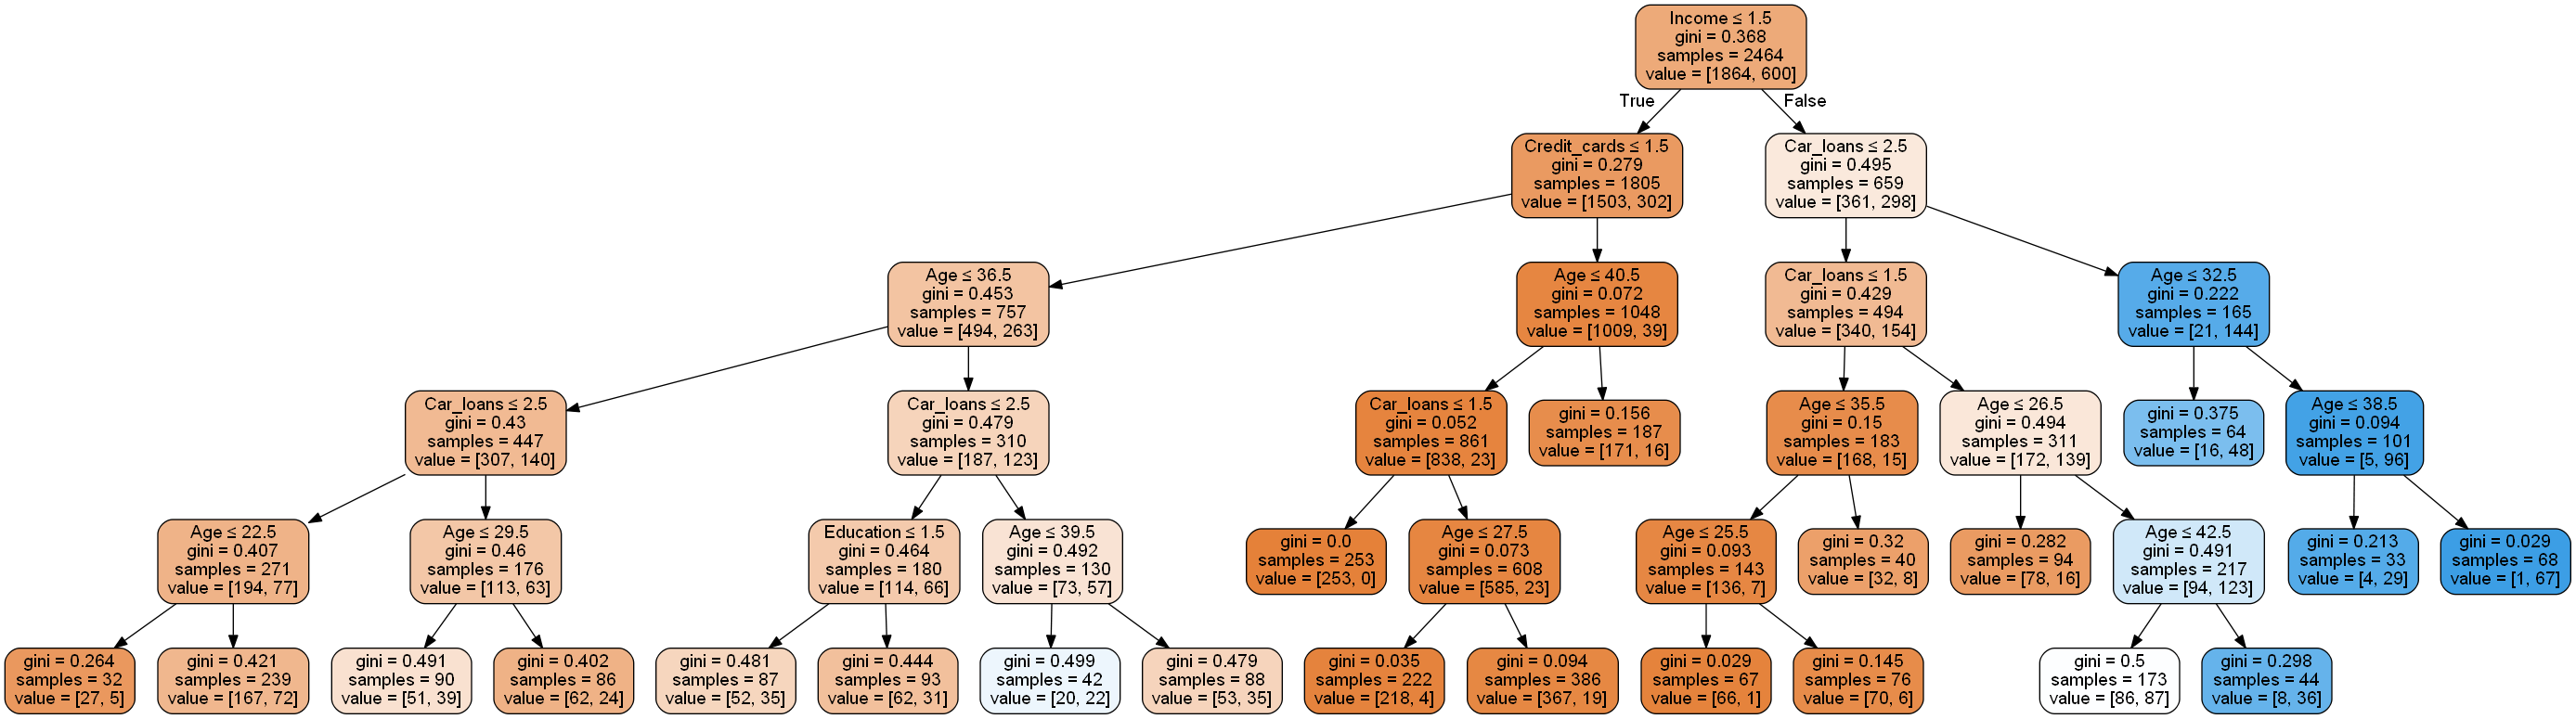

In [6]:
#決定木表示
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=['Age','Income', 'Credit_cards', 'Education', 'Car_loans'], 
                     #class_names=le.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [7]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X)
print('accuracy_score:%f' % accuracy_score(y, y_pred))


accuracy_score:0.818994


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
print(cm)

[[1729  135]
 [ 311  289]]


scikit-learnで混同行列を生成、適合率・再現率・F1値などを算出 | note.nkmk.me https://note.nkmk.me/python-sklearn-confusion-matrix-score/

In [9]:
from sklearn.metrics import roc_auc_score
y_score=clf.predict_proba(X)[:,1]
print('roc_auc_score:%f' % roc_auc_score(y, y_score))

roc_auc_score:0.862200


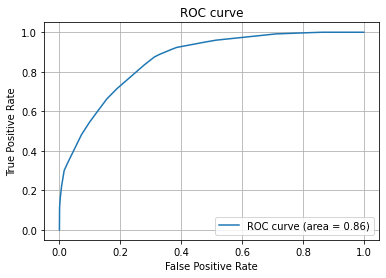

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y, y_score)

auc = auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

ROC曲線とAUCの出力 - Qiita https://qiita.com/9pid/items/53946c3ec4b2489e7cb2

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

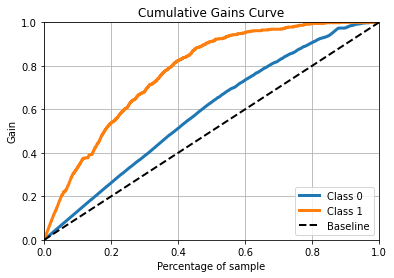

In [11]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y, clf.predict_proba(X)[:])

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('precision_score:%f' % precision_score(y, y_pred))
print('recall_score:%f' % recall_score(y, y_pred))
print('f1_score:%f' % f1_score(y, y_pred))

precision_score:0.681604
recall_score:0.481667
f1_score:0.564453


Metrics Module (API Reference) — Scikit-plot documentation https://scikit-plot.readthedocs.io/en/stable/metrics.html

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1864
           1       0.68      0.48      0.56       600

    accuracy                           0.82      2464
   macro avg       0.76      0.70      0.73      2464
weighted avg       0.81      0.82      0.81      2464



In [14]:
import sys

print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [15]:
print(pd.__version__)

1.0.5


In [16]:
import sklearn

print(sklearn.__version__)

0.23.2


In [17]:
print(skplt.__version__)

0.3.7
